## 3D spatially-resolved gene expression patterns

In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad
import umap
import os
import scipy.sparse
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import matplotlib as mpl

### Load results

In [2]:
slice_name_list = ["E16.5_E2S8", "E16.5_E2S9", "E16.5_E2S10", "E16.5_E2S11", "E16.5_E2S12"]
n_slice = len(slice_name_list)

In [3]:
adata_st_list = []
for i in range(n_slice):
    data_dir = "data_3d/Stereoseq-mouse-embryo/node_features_all_E16.5"
    adata = sc.read_h5ad(os.path.join(data_dir, "raw_counts/"+slice_name_list[i]+".h5ad"))
    adata.obs.index = adata.obs.index + "-" + str(i)
    adata_st_list.append(adata)

In [4]:
loc3d_path = "Results/INSPIRE_3d_reconstruction"
for i in range(n_slice):
    ad_3d = sc.read_h5ad(loc3d_path+"/adata_3d_spatial_"+str(i)+".h5ad")
    ad_3d = ad_3d[adata_st_list[i].obs.index, :]
    adata_st_list[i].obsm["spatial_3d"] = ad_3d.obsm["spatial_3d"]

### 3D expression of gene Afp in liver

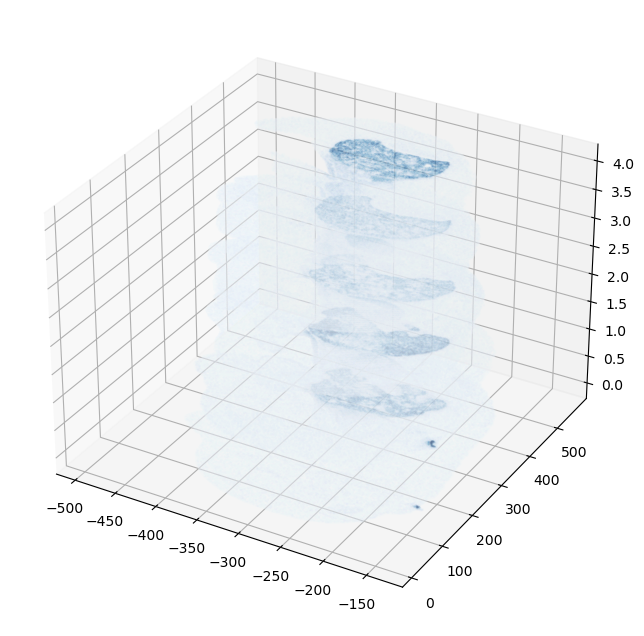

In [5]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

size = .05

# draw slices

for i_slice in range(n_slice):
    ax.scatter(adata_st_list[i_slice].obsm["spatial_3d"][:,0], 
               adata_st_list[i_slice].obsm["spatial_3d"][:,1], 
               adata_st_list[i_slice].obsm["spatial_3d"][:,2], rasterized=True, 
               s=size, c=np.array(adata_st_list[i_slice][:,"Afp"].X.toarray()).reshape(-1), alpha=0.2,
               cmap="Blues", vmax=35, vmin=-1)

plt.show()

### 3D expression of gene Myl7 in heart

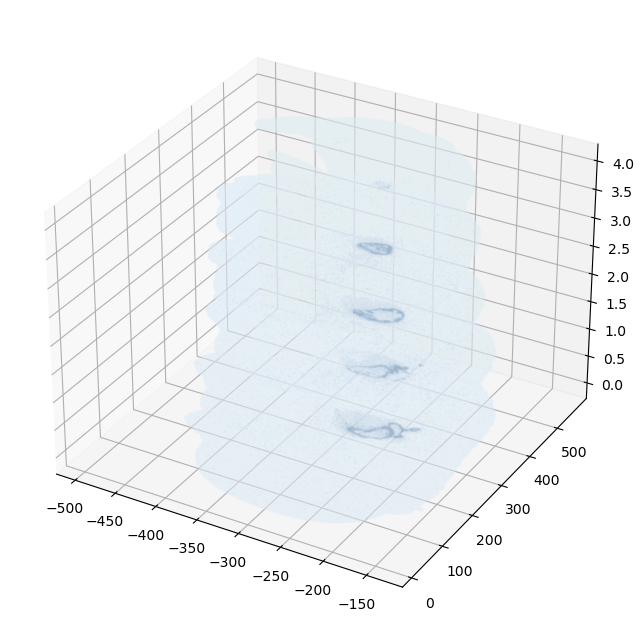

In [6]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

size = .05

# draw slices

for i_slice in range(n_slice):
    ax.scatter(adata_st_list[i_slice].obsm["spatial_3d"][:,0], 
               adata_st_list[i_slice].obsm["spatial_3d"][:,1], 
               adata_st_list[i_slice].obsm["spatial_3d"][:,2], rasterized=True, 
               s=size, c=np.array(adata_st_list[i_slice][:,"Myl7"].X.toarray()).reshape(-1), alpha=0.2,
               cmap="Blues", vmax=10, vmin=-1)

plt.show()

### 3D expression of gene Neurod6 in brain

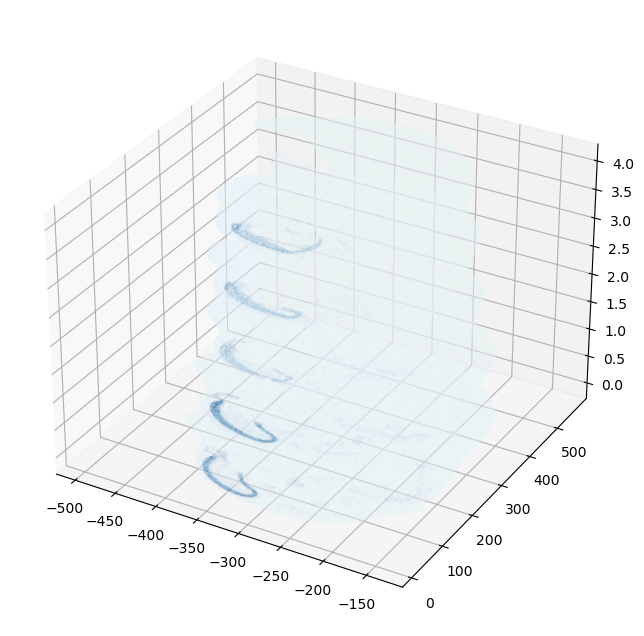

In [7]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

size = .05

# draw slices

for i_slice in range(n_slice):
    ax.scatter(adata_st_list[i_slice].obsm["spatial_3d"][:,0], 
               adata_st_list[i_slice].obsm["spatial_3d"][:,1], 
               adata_st_list[i_slice].obsm["spatial_3d"][:,2], rasterized=True, 
               s=size, c=np.array(adata_st_list[i_slice][:,"Neurod6"].X.toarray()).reshape(-1), alpha=0.2,
               cmap="Blues", vmax=15, vmin=-1)

plt.show()